In [2]:
import time
import random
import mlx.core as mx
import mlx.nn as nn
import mlx.optimizers as optim
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

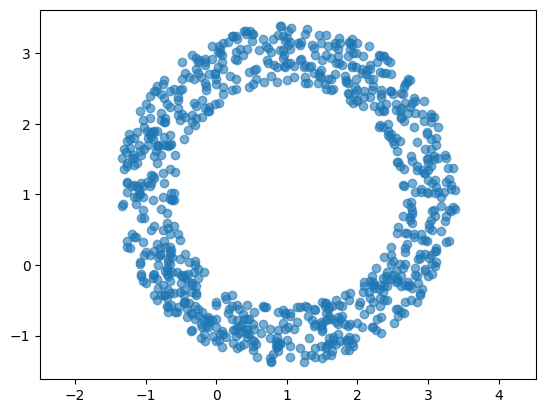

In [3]:
def make_data(center, radius, size, width):

    low_x = center[0] - radius - width
    high_x = center[0] + radius + width
    low_y = center[1] - radius - width
    high_y = center[1] + radius + width
    
    a = mx.arange(low_x,high_x,0.02)
    b = mx.arange(low_y,high_y,0.02)
    
    aa, bb = np.meshgrid(a, b, indexing='ij')

    # Stack and reshape to Cartesian product
    cartesian = np.stack([aa.ravel(), bb.ravel()], axis=1)

    s = random.sample(list(cartesian), size)

    xys = [x for x in s if (((x[0] - center[0]) ** 2 + (x[1] - center[1]) ** 2 >= (radius - width) ** 2) and
                             (x[0] - center[0]) ** 2 + (x[1] - center[1]) ** 2 <= (radius + width) ** 2)]

    return xys

xys = make_data((1,1), 2, 2_000, 0.4)
x = [a[0] for a in xys]
y = [a[1] for a in xys]

plt.scatter(x, y, alpha=0.6)
plt.axis("equal");

In [4]:
(-1) ** np.random.choice(2, 10)

array([-1, -1, -1, -1, -1,  1, -1,  1,  1, -1])

In [5]:
a=np.random.uniform(-1,1,10)
a, a/10

(array([-0.09448107, -0.80828022, -0.78504415, -0.39322877,  0.97293459,
        -0.78934006, -0.50608865,  0.51270139, -0.37349504, -0.45755911]),
 array([-0.00944811, -0.08082802, -0.07850441, -0.03932288,  0.09729346,
        -0.07893401, -0.05060887,  0.05127014, -0.0373495 , -0.04575591]))

In [6]:
import numpy as np
import time

size = 1_000_000

start = time.time()
a = (-1) ** np.random.choice(2, size)
print("Power method:", time.time() - start)

start = time.time()
b = np.random.choice([-1, 1], size)
print("Direct method:", time.time() - start)


Power method: 0.014096975326538086
Direct method: 0.010276079177856445


In [7]:
(-1) ** np.random.choice(2, 10)

array([ 1, -1,  1, -1, -1, -1, -1, -1, -1,  1])

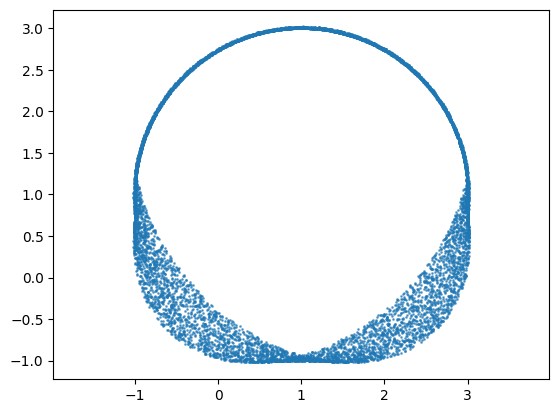

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(center, radius, size, width):
    angles = np.random.uniform(0, np.pi, size)  # Half-circle
    signs = np.random.choice([-1, 1], size)     # Flip to cover both U and ∩
    
    # Base circle points
    x = center[0] + radius * np.cos(angles)
    y = center[1] + signs * radius * np.sin(angles)

    # Add perpendicular noise
    wiggle = np.random.uniform(-width, width, size)
    dx = -np.sin(angles)  # unit vector perpendicular to the circle
    dy = np.cos(angles)

    x += wiggle * dx
    y += wiggle * dy

    return x, y

# Example usage
x, y = make_data(center=(1, 1), radius=2, size=10_000, width=0.3)
plt.scatter(x, y, alpha=0.6, s=1)
plt.axis("equal")
plt.show()


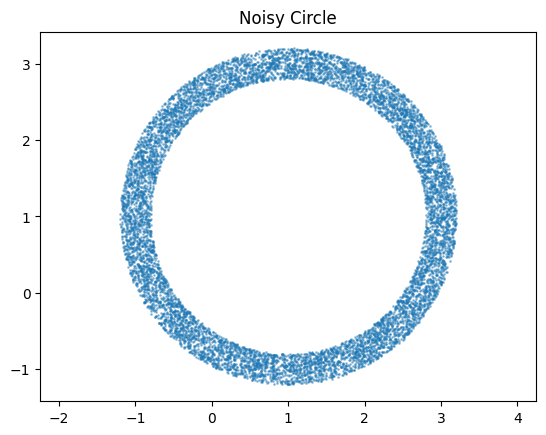

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(center, radius, size, width):
    # Uniform angle around the circle
    theta = np.random.uniform(0, 2 * np.pi, size)

    # Add radial noise (the "wiggle")
    r = radius + np.random.uniform(-width, width, size)

    # Convert polar to cartesian
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)

    return x, y

# Example usage
x, y = make_data(center=(1, 1), radius=2, size=10_000, width=0.2)

plt.scatter(x, y, alpha=0.4, s=1)
plt.axis("equal")
plt.title("Noisy Circle")
plt.show()


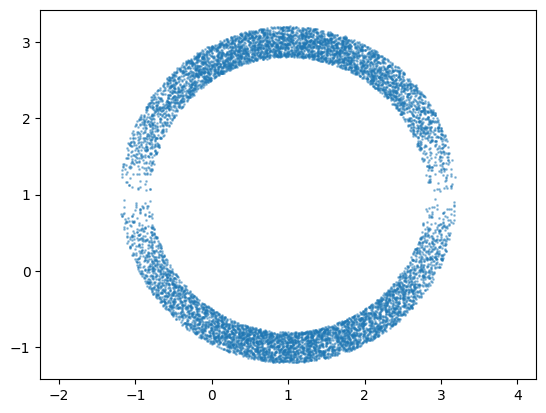

In [10]:
def make_data(center, radius, size, width):
    wiggle = np.random.uniform(-width, width, size)
    x = np.random.uniform(center[0] - radius, center[0] + radius, size)
    y = center[1] + (-1) ** np.random.choice(2, size) * np.sqrt((radius) ** 2 - (x - center[0]) ** 2)
    x = x + wiggle * (x - center[0]) / radius
    y = y + wiggle * (y - center[1])/ radius
    return x, y

x, y = make_data((1,1), 2, 10_000, .2)
plt.scatter(x, y, alpha=0.4, s=1)
plt.axis("equal");

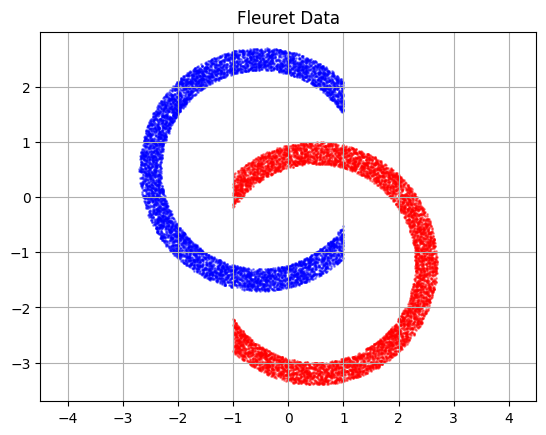

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(center, radius, size, width):
    # Uniform angle around the circle
    theta = np.random.uniform(0, 2 * np.pi, size)

    # Add radial noise (the "wiggle")
    r = radius + np.random.uniform(-width, width, size)

    # Convert polar to cartesian
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)

    return x, y

# Example usage
x_left, y_left = make_data(center=(-.5, .5), radius=2, size=10_000, width=0.2)
x_right, y_right = make_data(center=(.5, -1.2), radius=2, size=10_000, width=0.2)

x_blue = x_left[x_left < 1]
y_blue = y_left[x_left < 1]
x_red = x_right[x_right > -1]
y_red = y_right[x_right > -1]

s = min(x_blue.shape, x_red.shape)[0]
x_blue = x_blue[:s]
y_blue = y_blue[:s]
x_red = x_red[:s]
y_red = y_red[:s]

plt.scatter(x_blue, y_blue, alpha=0.4, s=1, color='blue')
plt.scatter(x_red, y_red, alpha=0.4, s=1, color='red')
plt.axis("equal")
plt.title("Fleuret Data")
plt.grid()
plt.show()


In [12]:
# Configuration
training_size = 1_500


In [13]:
x_blue.shape, x_red.shape, y_blue.shape, y_red.shape

((7693,), (7693,), (7693,), (7693,))

In [14]:
xs = mx.concat([mx.array(x_blue), mx.array(x_red)]).reshape(-1,1)
ys = mx.concat([mx.array(y_blue), mx.array(y_red)]).reshape(-1,1)

Xs = mx.concat([xs, ys], axis=1)
target = mx.concat([mx.ones(len(x_red)), mx.zeros(len(x_red))])

Xs.shape, target.shape

((15386, 2), (15386,))

In [15]:
mean = Xs.mean(axis=0)       # shape (2,)
std = Xs.std(axis=0)         # shape (2,)
X_norm = (Xs - mean) / std

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X_norm), list(target))
# X_train, X_test, y_train, y_test = train_test_split(np.array(Xs), list(target))
y_train = mx.array(y_train)
y_test = mx.array(y_test)

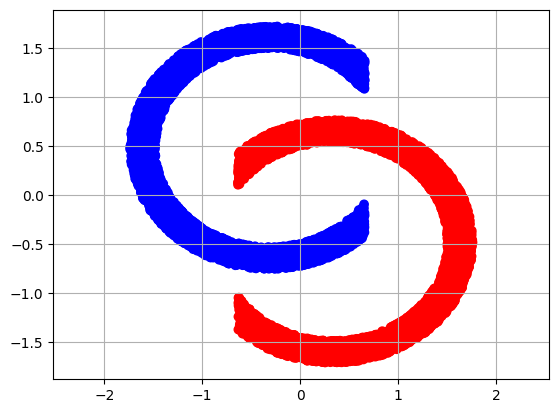

In [17]:
colors = ['red' if y.item() == 0 else 'blue' for y in y_train]
plt.scatter(X_train[:,0], X_train[:,1], color=colors);
plt.axis("equal");
plt.grid();


In [18]:
X_train.shape, X_test.shape

((11539, 2), (3847, 2))

In [ ]:
depth = 8

layers = []
for x in range(depth):
    layers.append(nn.Linear(2, 2))
    layers.append(nn.Tanh())
    # layers.append(nn.ReLU())
    
layers.append(nn.Linear(2, 1))

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            *layers
        )

    def __call__(self, x):
        return self.net(x)

def print_grad_norms(grads, prefix="", output=[]):
    if isinstance(grads, dict):
        for k, v in grads.items():
            if k == 'bias':
                pass
            else:
                print_grad_norms(v, prefix=f"{prefix}.{k}" if prefix else k)
    elif isinstance(grads, list):
        for i, v in enumerate(grads):
            print_grad_norms(v, prefix=f"{prefix}[{i}]")
    elif isinstance(grads, mx.array):
        norm = mx.linalg.norm(grads).item()
        # print(f"grad norm {prefix}: {norm:.6e}")
        output.append(norm)
        
# 2. Generate training data
np.random.seed(42)

# 3. Initialize model and optimizer
model = MyModel()

def loss_fn(model, X, y):
    return nn.losses.binary_cross_entropy(model(X).reshape(-1), y, reduction="mean")

loss_and_grad_fn = nn.value_and_grad(model, loss_fn)

@partial(mx.compile, inputs=model.state)
def eval_fn(X, y):
    probs = mx.sigmoid(model(X))
    preds = (probs > 0.5).astype(mx.float32)
    return mx.mean(preds.reshape(-1) == y)

def batch_iterate(batch_size, X, y):
    perm = mx.array(np.random.permutation(y.size))
    for s in range(0, y.size, batch_size):
        ids = perm[s : s + batch_size]
        # print(y[ids].mean().item())
        yield X[ids], y[ids]


In [185]:
learning_rate = .3
batch_size = 2048
epochs = 30

optimizer = optim.SGD(learning_rate=learning_rate)
@partial(mx.compile, inputs=model.state, outputs=model.state)
def step(X, y):
    # print(X.shape, y.shape)
    loss, grads = loss_and_grad_fn(model, X, y)
    optimizer.update(model, grads)
    return loss, grads

# 4. Training loop
tic = time.perf_counter()

for e in range(epochs):
    for X, y in batch_iterate(batch_size, X_train, y_train):
        _, grads = step(mx.array(X), y)
        mx.eval(model.state)
        print(" ## GRADIENT ## ")
        gradients = print_grad_norms(grads)
        print(min(print_grad_norms, max(print_grad_norms), np.mean(gradients)))
    accuracy = eval_fn(mx.array(X_test), y_test)
    loss = loss_fn(model, mx.array(X_test), y_test)
    toc = time.perf_counter()
    print(
        f"Epoch {e}: Test accuracy {accuracy.item():.3f}, Loss: {loss:.3f},"
        f" Time {toc - tic:.3f} (s)"
    )

    print(" ## NORM ## ")
    for l in model.net.layers:
        if isinstance(l, nn.layers.Linear):
            print(mx.linalg.norm(l.parameters()['weight']).item())
            

 ## GRADIENT ## 


TypeError: 'function' object is not iterable

In [159]:
class MySubModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(*model.net.layers[:-1])

    def __call__(self, x):
        return self.net(x)



In [160]:
model(v)

array([[-0.0286177],
       [-0.0286177]], dtype=float32)

In [161]:
sub_model = MySubModel()
sub_model(v)

array([[-0.976743, -0.984729],
       [-0.976743, -0.984729]], dtype=float32)

In [162]:
for l in model.net.layers:
    if isinstance(l, nn.layers.Linear):
        print(mx.linalg.norm(l.parameters()['weight']).item())

2.770771026611328
3.050814151763916
2.8752248287200928
2.1474180221557617
1.8579914569854736
1.872733235359192
2.5983407497406006
3.384775161743164
4.963660717010498


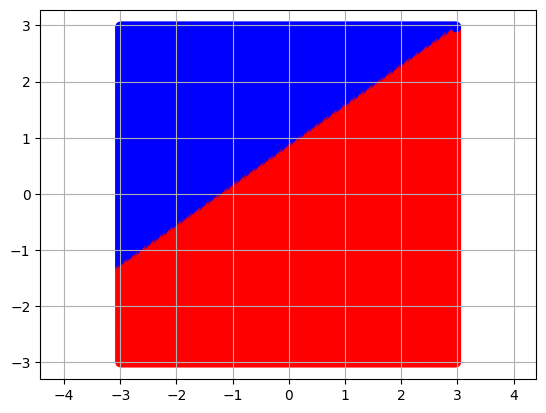

In [163]:
a = mx.arange(-3,3,0.02)
b = mx.arange(-3,3,0.02)
a.shape, b.shape

aa, bb = np.meshgrid(a, b, indexing='ij')

# Stack and reshape to Cartesian product
cartesian = np.stack([aa.ravel(), bb.ravel()], axis=1)

len(cartesian)

colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(cartesian))) > 0.5)).astype(int)]
plt.scatter(cartesian[:,0], cartesian[:,1], color=colors);

plt.axis("equal");
plt.grid();

In [164]:
img = sub_model(mx.array(cartesian))
img

colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(cartesian))) > 0.5)).astype(int)]

In [165]:
model.net.layers[-1].weight, model.net.layers[-1].bias

(array([[3.68863, -3.32144]], dtype=float32), array([0.303512], dtype=float32))

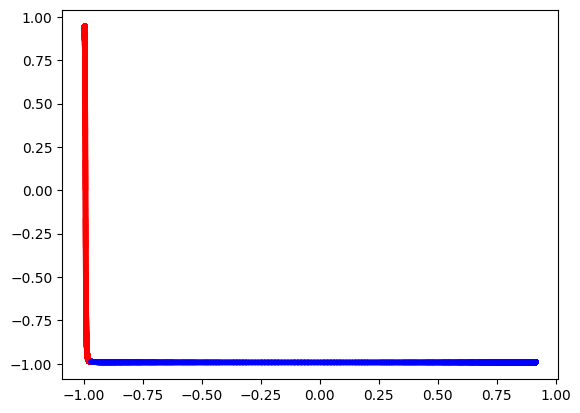

In [166]:
x=img[:,0]
y=img[:,1]
plt.scatter(x, y, alpha=0.75, s=10, color=colors)

In [114]:
list(range(17))[:-13]

[0, 1, 2, 3]

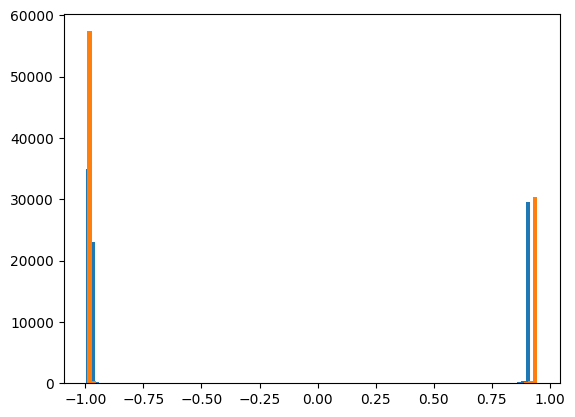

In [167]:
plt.hist(img[:, 0].tolist(), bins=100);
plt.hist(img[:, 1].tolist(), bins=100);

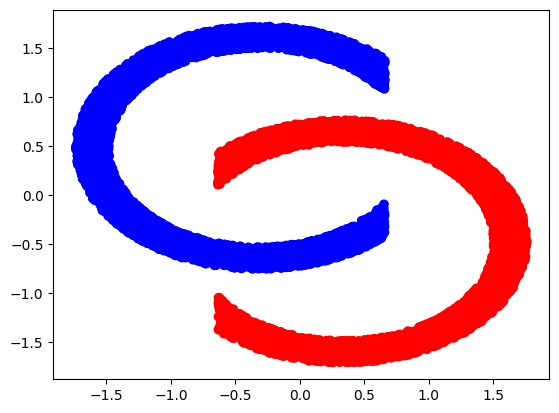

In [ ]:
colors = ['red' if y.item() == 0 else 'blue' for y in y_train]
plt.scatter(X_train[:,0], X_train[:,1], color=colors);

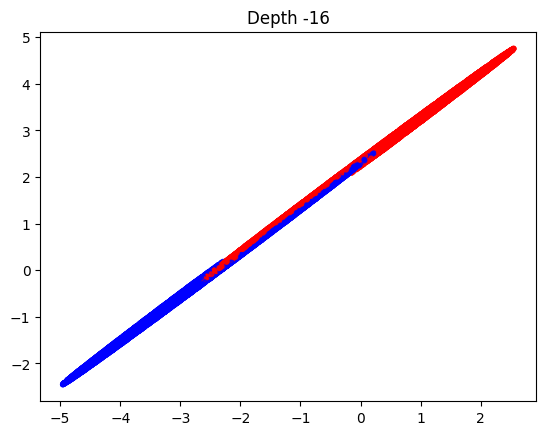

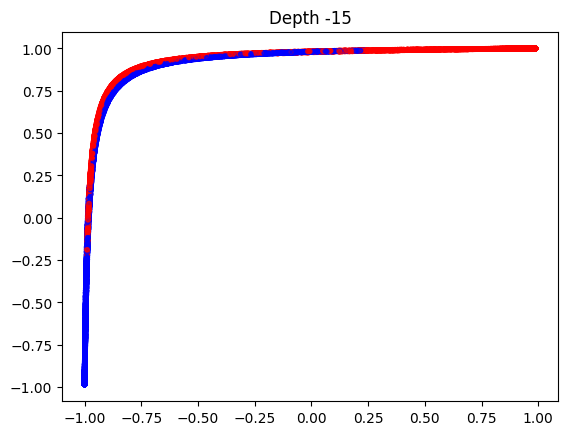

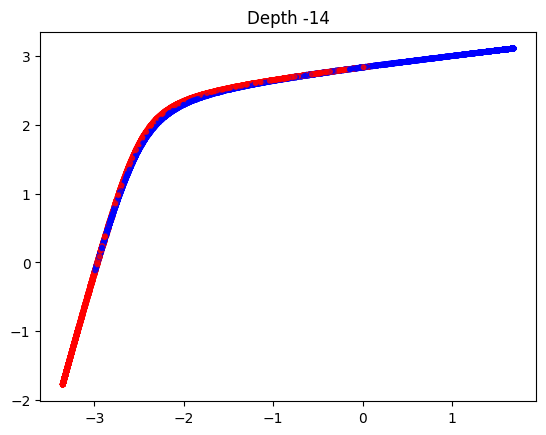

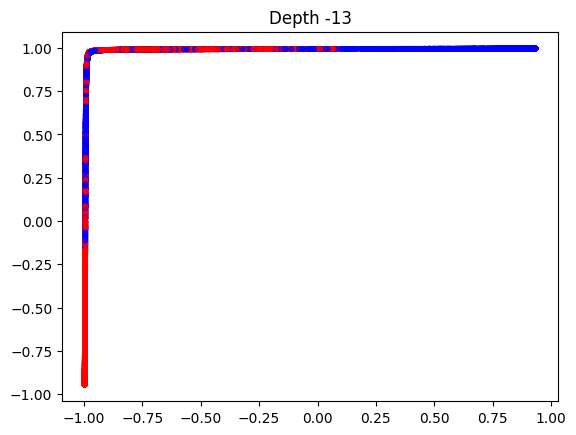

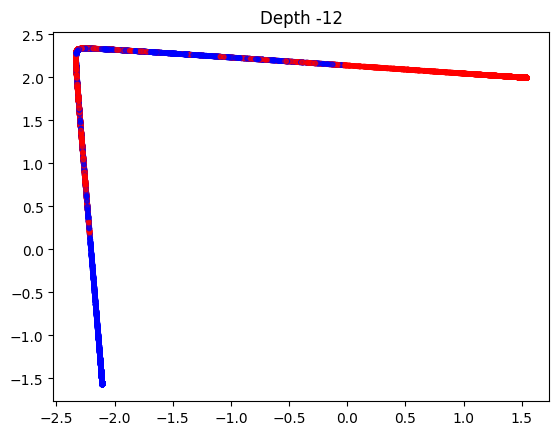

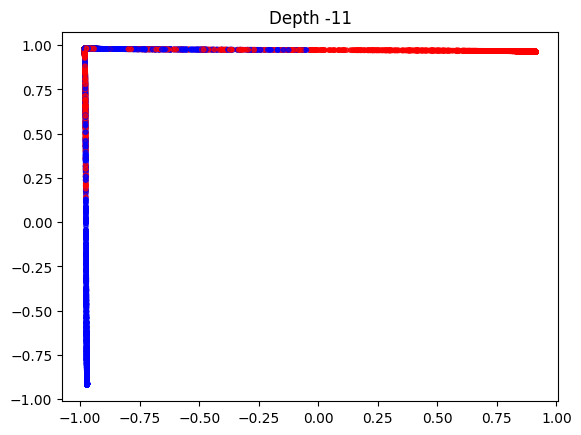

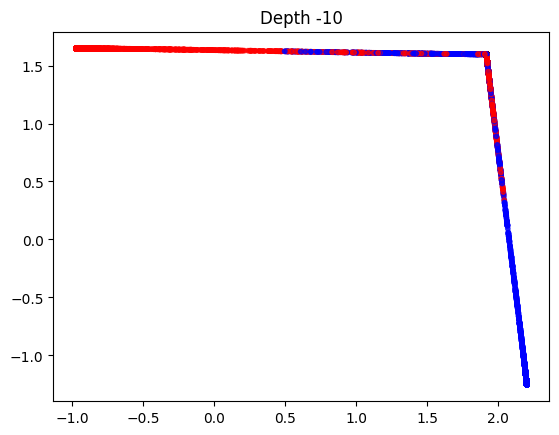

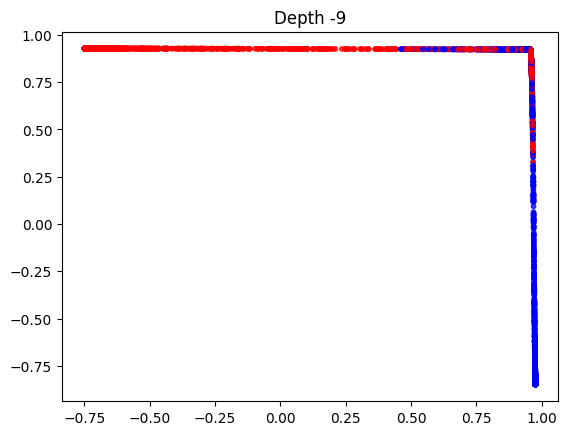

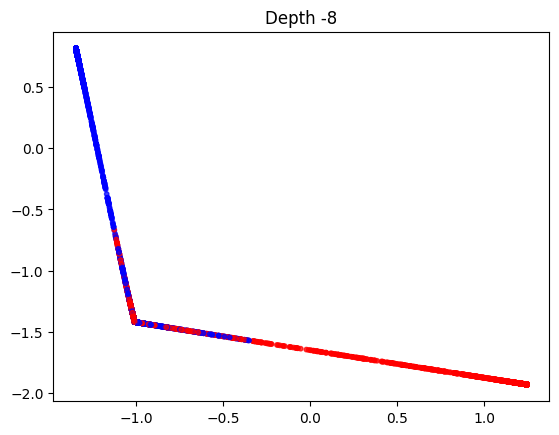

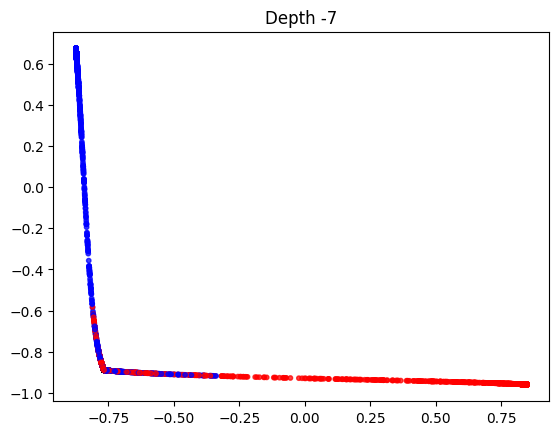

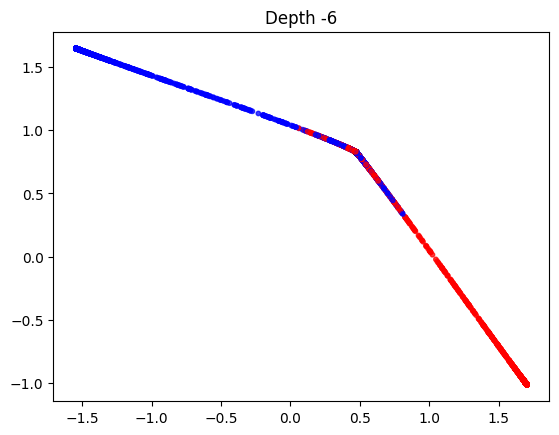

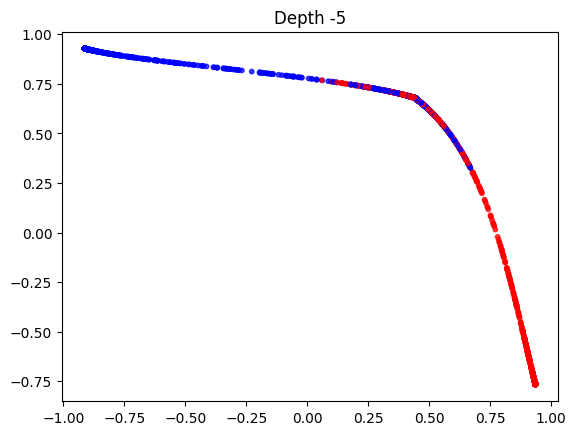

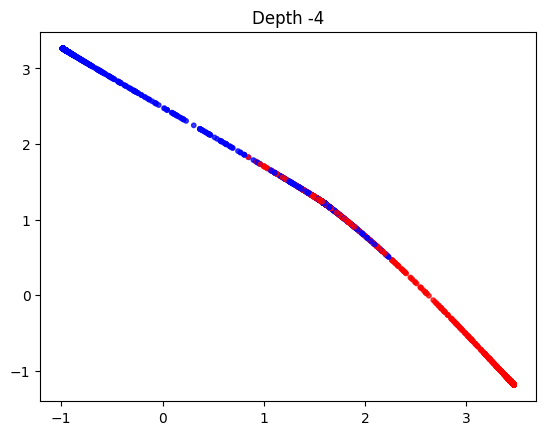

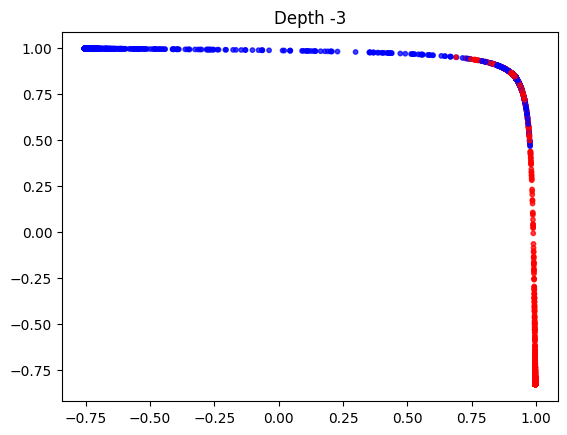

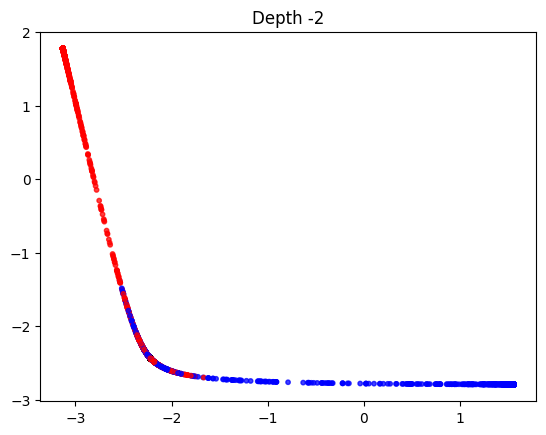

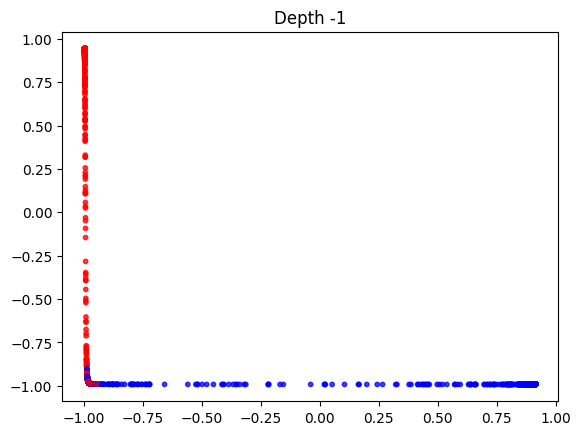

In [168]:
for dt in list(range(-depth * 2, 0)):
    class MySubModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(*model.net.layers[:dt])

        def __call__(self, x):
            return self.net(x)

    sub_model = MySubModel()
    
    img = sub_model(mx.array(X_train))

    # colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(sub_model(mx.array(cartesian))) > 0.5)).astype(int)]
    colors = ['red' if y.item() == 0 else 'blue' for y in y_train]

    plt.figure()

    x=img[:,0]
    y=img[:,1]
    plt.scatter(x, y, alpha=0.75, s=10, color=colors)
    plt.title(f"Depth {dt}")

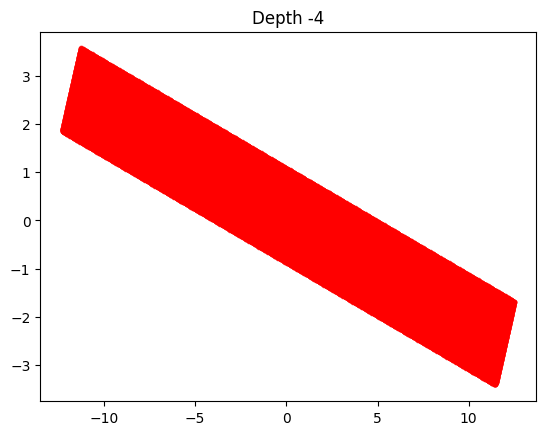

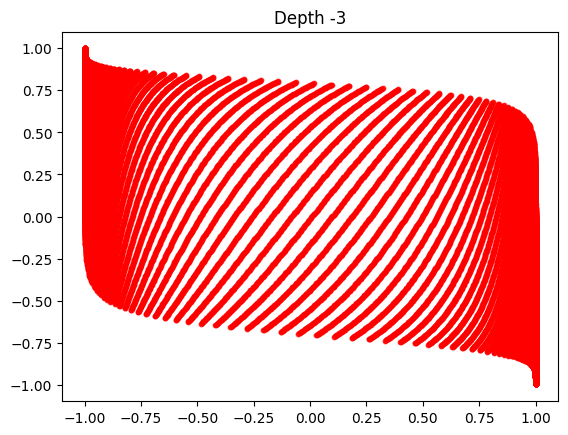

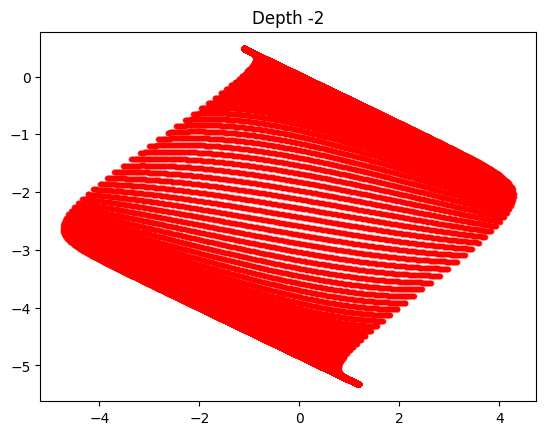

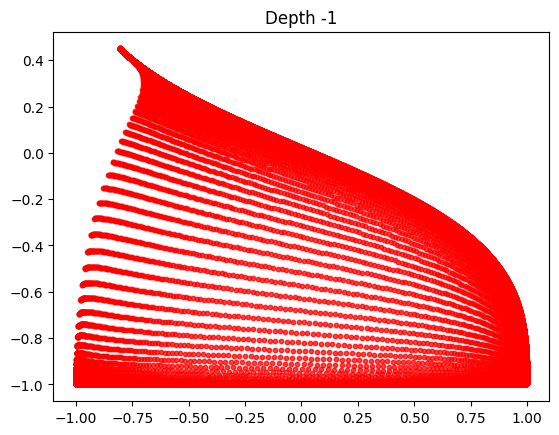

In [128]:
for dt in list(range(-depth * 2, 0)):
    class MySubModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(*model.net.layers[:dt])

        def __call__(self, x):
            return self.net(x)

    sub_model = MySubModel()
    
    img = sub_model(mx.array(cartesian))

    # colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(sub_model(mx.array(cartesian))) > 0.5)).astype(int)]
    colors = ['red']

    plt.figure()

    x=img[:,0]
    y=img[:,1]
    plt.scatter(x, y, alpha=0.75, s=10, color=colors)
    plt.title(f"Depth {dt}")

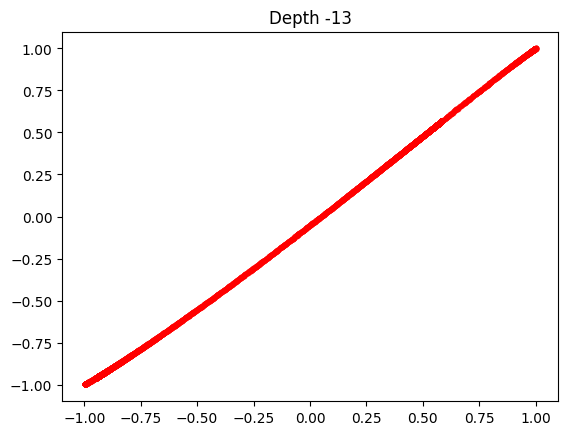

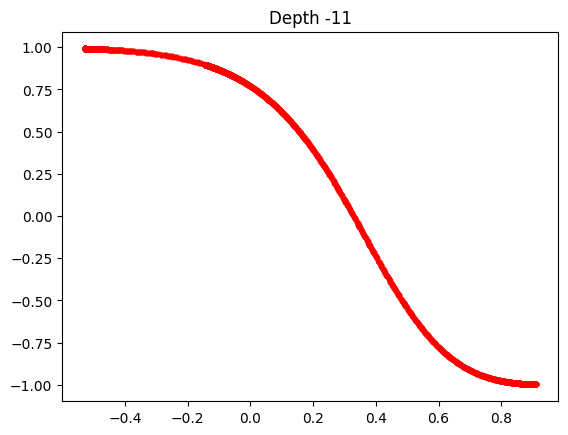

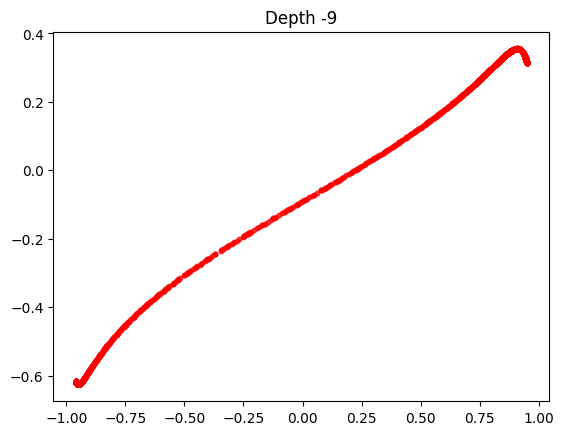

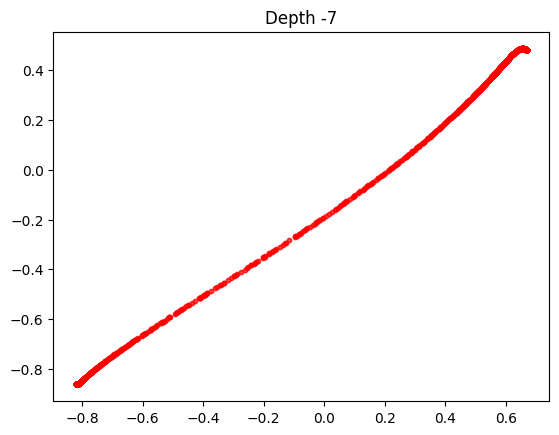

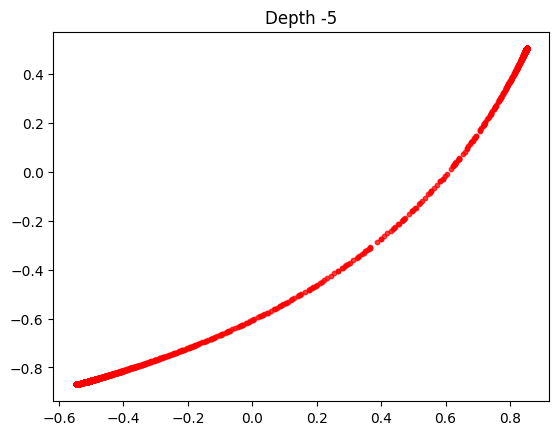

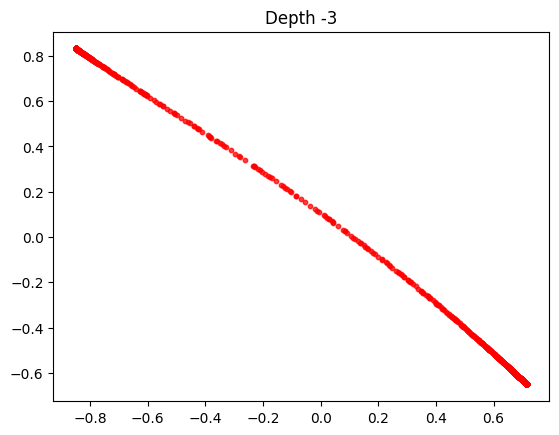

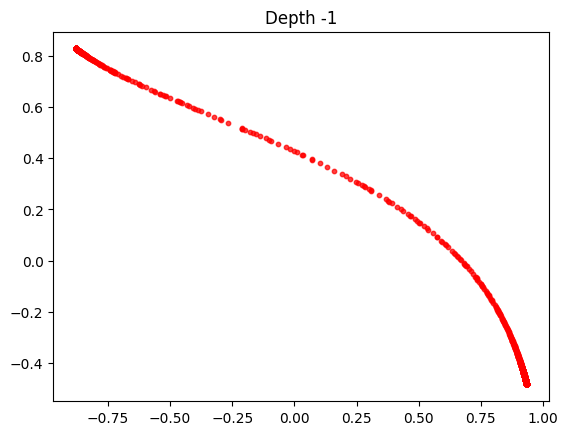

In [200]:
for dt in [-13,-11,-9,-7,-5,-3,-1]:
    class MySubModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(*model.net.layers[:dt])

        def __call__(self, x):
            return self.net(x)

    sub_model = MySubModel()
    
    img = sub_model(mx.array(cartesian))

    # colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(sub_model(mx.array(cartesian))) > 0.5)).astype(int)]
    colors = ['red']

    plt.figure()

    x=img[:,0]
    y=img[:,1]
    plt.scatter(x, y, alpha=0.75, s=10, color=colors)
    plt.title(f"Depth {dt}")

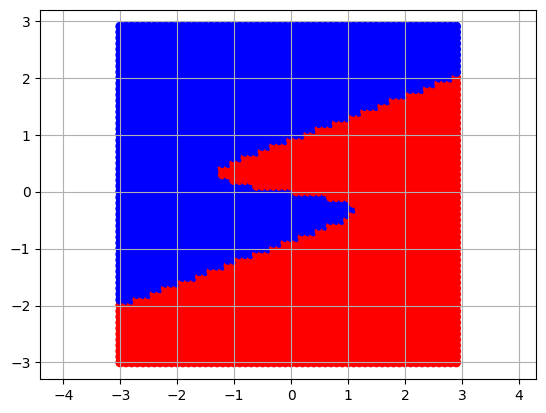

In [184]:
a = mx.arange(-3,3,0.1)
b = mx.arange(-3,3,0.1)
a.shape, b.shape

aa, bb = np.meshgrid(a, b, indexing='ij')

# Stack and reshape to Cartesian product
cartesian = np.stack([aa.ravel(), bb.ravel()], axis=1)

len(cartesian)

colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(cartesian))) > 0.5)).astype(int)]
plt.scatter(cartesian[:,0], cartesian[:,1], color=colors);

plt.axis("equal");
plt.grid();

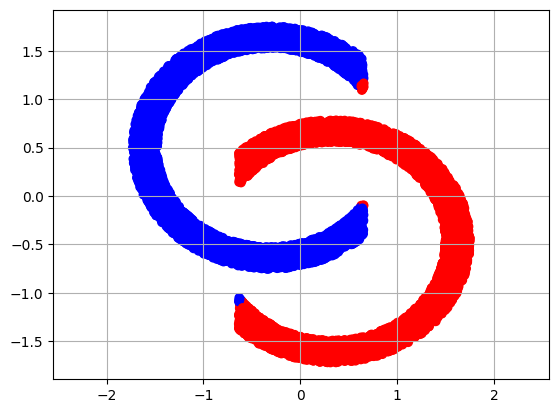

In [185]:
colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(X_train))) > 0.5)).astype(int)]
plt.scatter(X_train[:,0], X_train[:,1], color=colors);
plt.axis("equal");
plt.grid();

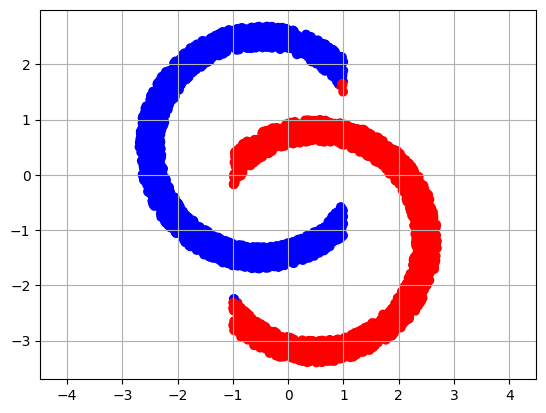

In [186]:
X_T = (X_test * std) + mean
colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(X_test))) > 0.5)).astype(int)]
plt.scatter(X_T[:,0], X_T[:,1], color=colors);
plt.axis("equal");
plt.grid();

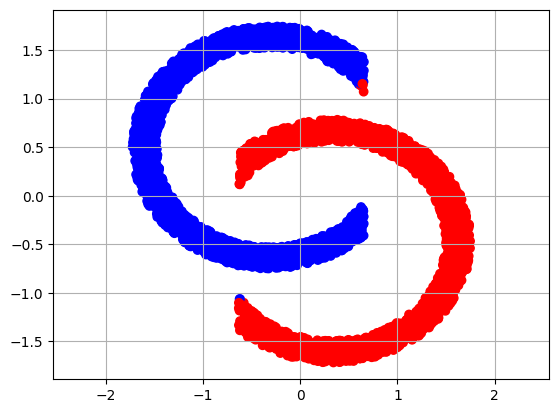

In [187]:
colors = ['red' if y.item() == 0 else 'blue' for y in (np.array(mx.sigmoid(model(mx.array(X_test))) > 0.5)).astype(int)]
plt.scatter(X_test[:,0], X_test[:,1], color=colors);
plt.axis("equal");
plt.grid();